# 체격으로 체중 추론(직접 계산)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow import  keras

def process(txt):
    if "(" in txt:
        txt = txt.split("(")[0]
        txt = txt.strip()
    return float(txt)

data = []
with open('pysicalinfo.csv', 'r', encoding='euc-kr') as f:
    # 한줄 건너뛰기
    f.readline()
    for line in f:
        # print(line.strip())
        # 각 줄을 콤마(,)로 분리
        splt = line.strip().split(',')
        # print(splt[2:])
        # 순번, 측정일자 제외하고 변수 처리
        chest = process(splt[2])
        arm = process(splt[3])
        height = process(splt[4])
        waist = process(splt[5])
        sat = process(splt[6])
        head = process(splt[7])
        feet = process(splt[8])
        weight = process(splt[9])
        data.append([chest, arm, height, waist, sat, head, feet, weight])
# 섞기
random.shuffle(data)
# numpy 배열로 변환
data = np.asarray(data)
# 0~1 사이로 정규화
normalized_data = data / np.max(data, axis=0) # 각 열의 최대값을 저장해놓았다 나중에 곱해주면 반정규화 가능
x, y = normalized_data.shape
# print(x,y)
train_X = normalized_data[:int(x * 0.8), :-1]
train_Y = normalized_data[:int(x * 0.8), -1]
test_X = normalized_data[int(x * 0.8):, :-1]
test_Y = normalized_data[int(x * 0.8):, -1]
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(134384, 7) (134384,) (33596, 7) (33596,)


In [8]:
model = keras.Sequential([
    keras.layers.Dense(7),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(optimizer="adam", loss="mse", metrics=['mae'])

In [10]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_X, train_Y, epochs=50,
                    validation_data=(test_X, test_Y),
                    callbacks=[early_stop])

Epoch 1/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0018 - mae: 0.0311 - val_loss: 0.0013 - val_mae: 0.0267
Epoch 2/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0014 - mae: 0.0279 - val_loss: 0.0021 - val_mae: 0.0369
Epoch 3/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0013 - mae: 0.0272 - val_loss: 0.0013 - val_mae: 0.0264
Epoch 4/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0013 - mae: 0.0270 - val_loss: 0.0014 - val_mae: 0.0284
Epoch 5/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0013 - mae: 0.0267 - val_loss: 0.0012 - val_mae: 0.0256
Epoch 6/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0013 - mae: 0.0268 - val_loss: 0.0012 - val_mae: 0.0259
Epoch 7/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0013 - mae: 0.0265 - val_loss: 0.0013 - val_mae: 0.0264
Epoch 8/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0013 - mae: 0.0265 - val_loss: 0.0023 - val_mae: 0.0389
Epoch 9/50
4200/4200 ━━━━━━━━━━━━━━━━━━

In [11]:
pred = model.predict(test_X)
pred

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step


array([[0.5185624 ],
       [0.5652364 ],
       [0.43806022],
       ...,
       [0.5185279 ],
       [0.42933047],
       [0.6061663 ]], shape=(33596, 1), dtype=float32)

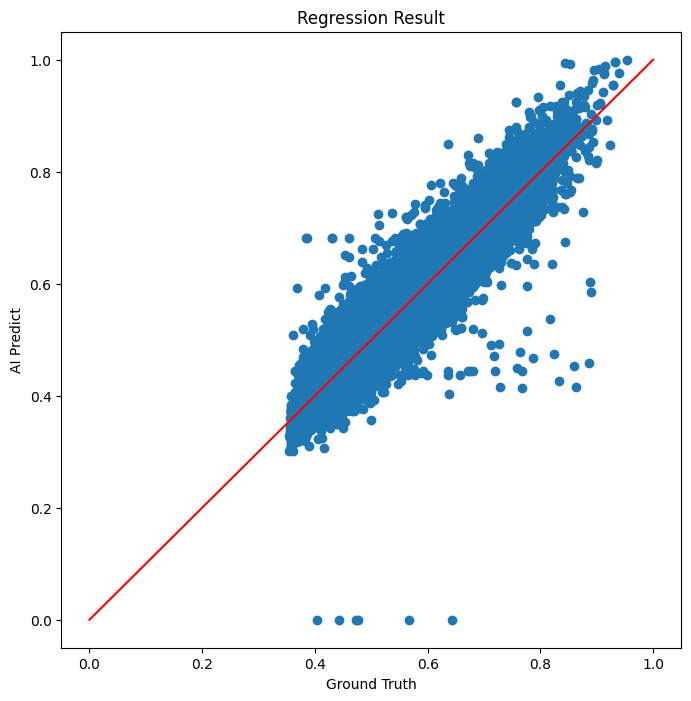

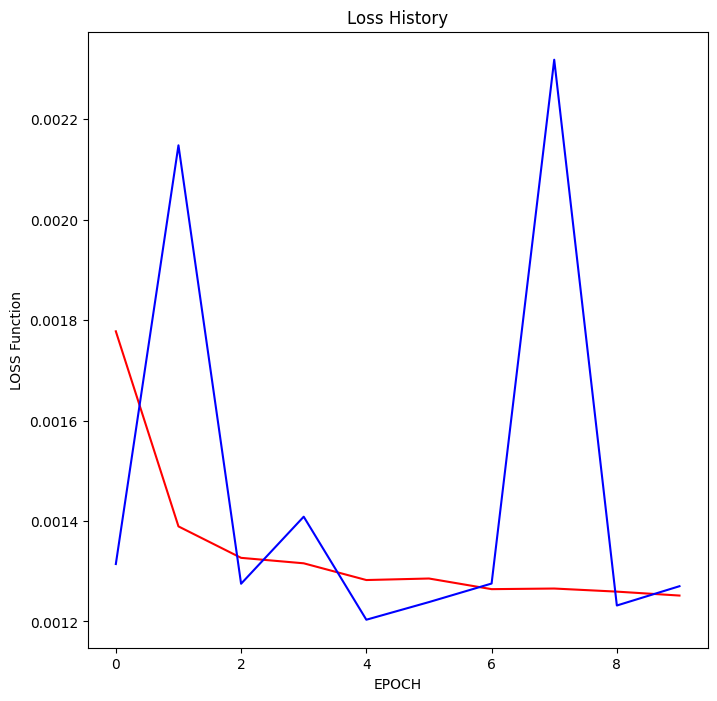

In [18]:
def draw_graph(prediction, label, history):
    X = prediction #/ np.max(prediction, axis=0)
    Y = label# / np.max(label, axis=0)

    minval = min(np.min(X), np.min(Y))
    maxval = max(np.max(X), np.max(Y))

    fig = plt.figure(figsize=(8, 8))
    plt.title("Regression Result")
    plt.xlabel("Ground Truth")
    plt.ylabel("AI Predict")
    plt.scatter(X, Y)
    plt.plot([minval, maxval], [minval, maxval], "red")
    fig.savefig("result.png")

    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")
draw_graph(model(test_X), test_Y, history)

In [16]:
new_data_sample = np.array([[101,83,173,81,74,55,24]])
prediction = model.predict(new_data_sample)

print("예측 결과", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
예측 결과 195.16692
